In [1]:
#Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [15]:
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

dataset = make_moons(n_samples=10000,
                     noise=0.4)

X_train, X_test, y_train, y_test = train_test_split(dataset[0], dataset[1], test_size=0.2, random_state=42)

In [16]:
for i in (X_train, y_train, X_test, y_test):
    print(i.shape)

(8000, 2)
(8000,)
(2000, 2)
(2000,)


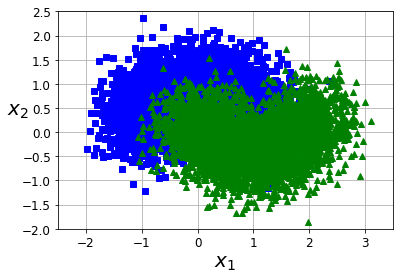

In [18]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X_train, y_train, [-2.5, 3.5, -2, 2.5])
plt.show()

In [22]:
param_grid = [
    {"criterion":["gini"],
     "max_depth":[1,2],
     "min_samples_split":[1,2,3,4],
     "min_samples_leaf":[1,2,3,4]},    
]

tree_clf = DecisionTreeClassifier()
grid_search = GridSearchCV(tree_clf,
                           param_grid,
                           cv=5,
                           scoring="neg_mean_squared_error", 
                           verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=1, min

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/biowar1337/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/home/biowar1337/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/home/biowar1337/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estima

[CV]  criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=4 
[CV]  crit

/home/biowar1337/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/home/biowar1337/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/home/biowar1337/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greate

[CV]  criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=4 
[CV]  crit

/home/biowar1337/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/home/biowar1337/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/home/biowar1337/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greate

[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=4 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=1, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=1, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=1, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=1, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=1 
[CV]  crit

/home/biowar1337/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/home/biowar1337/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/home/biowar1337/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greate

[CV]  criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=3 
[CV]  crit

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    1.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'criterion': ['gini'], 'max_depth': [1, 2],
        

In [21]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [23]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [27]:
y_pred = grid_search.best_estimator_.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8455

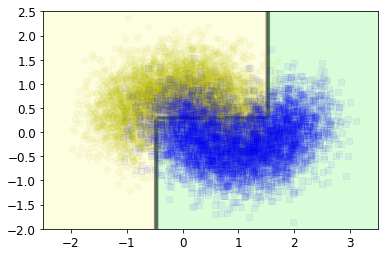

In [44]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.4, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=0.05)
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=0.05)
        plt.axis(axes)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plot_decision_boundary(grid_search.best_estimator_,
                       dataset[0],
                       dataset[1],
                       axes=[-2.5, 3.5, -2, 2.5],
                       iris=False,
                       plot_training=True)

plt.show()

In [51]:
from sklearn.model_selection import ShuffleSplit
from scipy.stats import mode

tree_list = [DecisionTreeClassifier(**grid_search.best_params_) for _ in range(1000)]
rs = ShuffleSplit(n_splits=10)

In [71]:
train_data = [dataset[0][indices_train[:100]] for indices_train, indices_test in list(rs.split(dataset[0]))[0][0]]

TypeError: cannot unpack non-iterable numpy.int64 object

In [70]:
len(train_data), len(tree_list)

(10, 1000)

In [68]:
len(list(rs.split(dataset[0]))[0][0])

9000

# Correct #8

In [79]:
n_trees = 1000,
n_instances = 100

mini_sets = []

rs = ShuffleSplit(n_splits=n_trees,
                  test_size=len(X_train) - n_instances,
                  random_state=42)
dataset = list(rs.split(X_train))

for mini_train_index, mini_test_index in zip(dataset[0], dataset[1]):
    X_mini_train = X_train[mini_train_index]
    y_mini_train = y_train[mini_train_index]
    mini_sets.append((X_mini_train, y_mini_train))

TypeError: 'tuple' object cannot be interpreted as an integer